<a href="https://colab.research.google.com/github/Yooru6/Keras-MNIST-FMNIST/blob/master/Encode%26Decode_MNIST_Dense%26Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecoding & Decoding with Dense and Convoutional Neural Network
- examples with Dense- & Convolutional NN
- technique can be used to reconstruct images with bad quality <br>

as guide i used article named "Making an Autoencoder" written by Arvin Singh Kushwaha: https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np
import tensorflow as tf

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K

## Dense
### Data
- load data
- plot samples

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

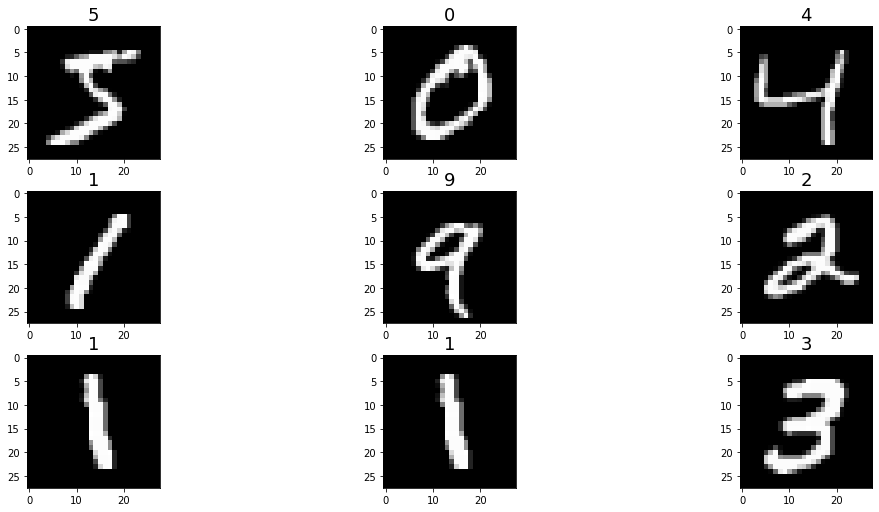

In [0]:
# Plot image data from x_train
fig, ax = plt.subplots(3, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i in range(7):
    #set_path = train_dir+_set
    ax[i].imshow(x_train[i],cmap='gray')
    ax[i].set_title(y_train[i],fontsize=18)
    ax[i+2].imshow(x_train[i+1],cmap='gray')
    ax[i+2].set_title(y_train[i+1],fontsize=18)

### Model
- Ecoder and Decoder
- 28x28 image file to size 32

In [0]:
LATENT_SIZE = 32

In [0]:
encoder = Sequential([
     tf.keras.layers.Flatten(input_shape = (28, 28)),

     tf.keras.layers.Dense(512),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(256),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(64),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(LATENT_SIZE),
     tf.keras.layers.LeakyReLU()
])


decoder = Sequential([
     tf.keras.layers.Dense(64, input_shape = (LATENT_SIZE,)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(256),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(512),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(784),
     tf.keras.layers.Activation("sigmoid"),

     tf.keras.layers.Reshape((28, 28))
])


img =  tf.keras.layers.Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)

In [0]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")
encoder.summary()
decoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)              

### Train & Plot
- squeezing the image to single vector of 32
- recontructing image to original size(28x28) with decoder

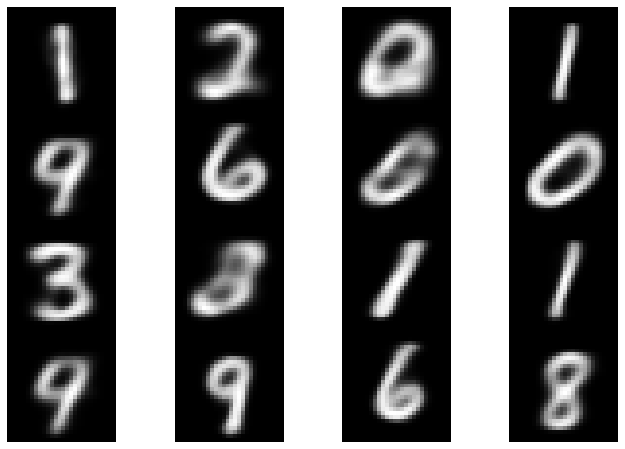

------ EPOCH 59 ------
469/469 [==============================] - 3s 6ms/step - loss: 0.1828 - val_loss: 0.1563


In [0]:
EPOCHS = 60

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(12, 8))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output()
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("------", "EPOCH", epoch, "------")
    model.fit(x_train, x_train,batch_size=128,shuffle=True,validation_data=(x_test, x_test))

## Convolutional

### Data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Model
- encoder
-decoder

In [0]:
import tensorflow as tf
#from tensorflow.keras.models import Model

encoder = Sequential([

  tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
  tf.keras.layers.MaxPooling2D((2,2),padding="same"),

  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding='same'),
  tf.keras.layers.MaxPooling2D((2,2),padding="same"),

  tf.keras.layers.Conv2D(16,(3, 3), activation="relu", padding='same'),
  tf.keras.layers.MaxPooling2D((2,2),padding="same"),

  tf.keras.layers.Conv2D(8,(3, 3), activation="relu", padding='same'),
  tf.keras.layers.MaxPooling2D((2,2),padding="same")

])

decoder = Sequential([
  
  tf.keras.layers.Conv2D(8,(3, 3), activation="relu", padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),

  tf.keras.layers.Conv2D(16,(3, 3), activation="relu", padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),

  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),

  tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
  tf.keras.layers.UpSampling2D((2,2)),

  tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding='same'),
  tf.keras.layers.Reshape((28, 28))

])

In [0]:
#Model=None
img = tf.keras.layers.Input(shape = (28, 28, 1))
latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.compile(optimizer='adam',
              loss='binary_crossentropy')
#model.summary()
encoder.summary()
decoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 8)          

### Train & Plot
- training model
  - squeezing image to size 32
  - while training plotting example image after each epoch

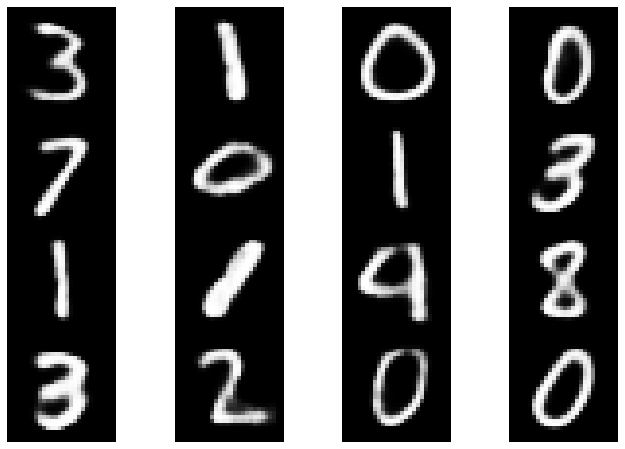

------ EPOCH 59 ------
469/469 [==============================] - 3s 7ms/step - loss: 0.0965 - val_loss: 0.0957


In [0]:
EPOCHS = 60

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(12, 8))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output()
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("------", "EPOCH", epoch, "------")
    model.fit(x_train, x_train,batch_size=128,shuffle=True,validation_data=(x_test, x_test))